# Photon number splitting
Gengyan Zhang, June 13 2016
## References
- [Resolving photon number states in a superconducting circuit](http://www.nature.com/nature/journal/v445/n7127/full/nature05461.html)
- [Qubit-photon interactions in a cavity: Measurement-induced dephasing and number splitting](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.74.042318)
- For simulation on photon number splitting using another method, see http://nbviewer.jupyter.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-10-cQED-dispersive-regime.ipynb

In [1]:
%matplotlib inline
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters and variables
N = 30   # maximum dimension for a photon fock state

# Operators
a = qt.tensor(qt.destroy(N), qt.qeye(2))    # annhilation operator for photon
adag = qt.tensor(qt.create(N), qt.qeye(2))  # creation operator for photon
sm = qt.tensor(qt.qeye(N), qt.sigmam())     # sigma_minus operator for spin
sp = qt.tensor(qt.qeye(N), qt.sigmap())     # sigma_plus operator for spin
sz = qt.tensor(qt.qeye(N), qt.sigmaz())     # sigma_z operator for spin

# Frequency in MHz, time in micro-second
omegaR = 7000*2*np.pi
omegaQ = 4000*2*np.pi
chi = -10*2*np.pi
kappaR = 1*2*np.pi
T1 = 50.0
gammaQ = 1.0/T1

# Collapse operators for Liouvillian
c_ops = [np.sqrt(kappaR)*a, np.sqrt(gammaQ)*sm]

# Parameters
deltaR = -chi  # deltaR = omega_cavitydrive - omegaR
ampR = 6.0     # cavity drive amplitude
numFreq = 251
deltaQlist = np.linspace(20.0*chi, -5.0*chi, numFreq)  # deltaQ = omega_qubitdrive - omegaQ
ampQ = 0.2     # qubit drive amplitude

In [3]:
# Calculate steady state for coherent drive
def ssCoherent(deltaQ, ampR):
    H = -deltaR*adag*a - deltaQ/2*sz + chi*adag*a*sz + \
        ampR*(a+adag) + ampQ*(sp+sm)
    rho = qt.steadystate(H, c_ops, method='direct')
    return qt.expect(sz, rho), qt.expect(adag*a, rho)

# In Windows, qutip.parallel_map might cause IPython kernel to hang forever
# In this case, switch to qutip.serial_map
# result[0] is expectation value of sigma_z, result[1] is expectation value of a^\dagger*a
result = np.array(qt.serial_map(ssCoherent, deltaQlist, task_args=(ampR,),
                                progress_bar=True)).T

# result = np.array(qt.parallel_map(ssCoherent, deltaQlist, task_args=(ampR,),
#                                   progress_bar=True)).T

# Calculate steady state photon number distribuction without qubit drive
# rho is the (reduced) steady state density matrix for photons
H = -deltaR*adag*a + chi*adag*a*sz + ampR*(a+adag)
rho = qt.ptrace(qt.steadystate(H, c_ops, method='direct'), 0)

10.4%. Run time:  10.01s. Est. time left: 00:00:01:26
20.3%. Run time:  20.53s. Est. time left: 00:00:01:20
30.3%. Run time:  29.58s. Est. time left: 00:00:01:08
40.2%. Run time:  38.61s. Est. time left: 00:00:00:57
50.2%. Run time:  47.66s. Est. time left: 00:00:00:47
60.2%. Run time:  56.74s. Est. time left: 00:00:00:37
70.1%. Run time:  65.77s. Est. time left: 00:00:00:28
80.1%. Run time:  74.85s. Est. time left: 00:00:00:18
90.0%. Run time:  84.05s. Est. time left: 00:00:00:09
Total run time:  93.10s


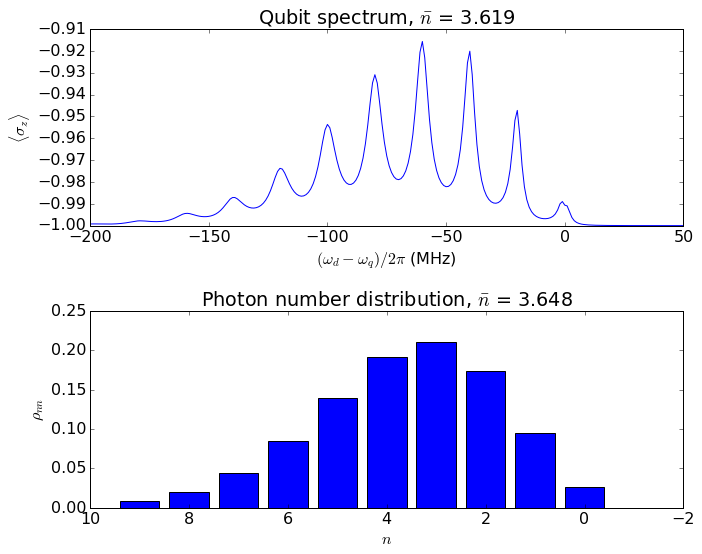

In [4]:
# Plot results
plt.rc('font', size=16)
plt.figure(figsize=(10,8))

nbar = np.mean(result[1])
plt.subplot(211)
plt.plot(deltaQlist/(2*np.pi), result[0])
plt.xlabel(r'$(\omega_d-\omega_q)/2\pi$ (MHz)')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.title(r'Qubit spectrum, $\bar{n}$ = %.3f' % nbar)

nbar = np.sum(np.arange(0, N)*rho.diag())
plt.subplot(212)
plt.bar(np.arange(0, 10), rho.diag()[0:10], align='center')
plt.gca().invert_xaxis()
plt.xlabel('$n$')
plt.ylabel(r'$\rho_{nn}$')
plt.title(r'Photon number distribution, $\bar{n}$ = %.3f' % nbar)

plt.tight_layout()

In [5]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,3.2.0.dev-cb698ef
Numpy,1.11.0
SciPy,0.17.1
matplotlib,1.5.1
Cython,0.23.4
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,4.2.0
Python,"2.7.10 (default, May 23 2015, 09:44:00) [MSC v.1500 64 bit (AMD64)]"
OS,nt [win32]
